Model training and saving

In [21]:
# Importing libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from google.colab import files
uploaded = files.upload()  # we choose products_clean.csv


Saving products_clean.csv to products_clean (1).csv


In [24]:
uploaded = files.upload()
print(uploaded.keys())  # покажет точное имя файла


Saving products_clean.csv to products_clean (2).csv
dict_keys(['products_clean (2).csv'])


In [25]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['products_clean (2).csv']))


In [26]:
# 2. Characteristics and target variable
# -------------------------
X = df["Product Title"]
y = df["Category Label"]


In [27]:
# 3. Division into train/test
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
# 4. Text vectorization
# -------------------------
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [29]:
# 5. Model training
# -------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [30]:
# 6. Model evaluation
# -------------------------
y_pred = model.predict(X_test_vec)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        17
            CPUs       0.98      1.00      0.99       749
 Digital Cameras       0.99      0.99      0.99       538
     Dishwashers       0.93      0.96      0.95       681
        Freezers       0.99      0.93      0.96       440
 Fridge Freezers       0.95      0.94      0.94      1094
         Fridges       0.86      0.92      0.89       687
      Microwaves       0.99      0.96      0.97       466
    Mobile Phone       0.00      0.00      0.00        11
   Mobile Phones       0.96      0.99      0.97       801
             TVs       0.97      0.99      0.98       708
Washing Machines       0.95      0.95      0.95       803
          fridge       0.00      0.00      0.00        25

        accuracy                           0.95      7020
       macro avg       0.74      0.74      0.74      7020
    weighted avg       0.95      0.95      0.9

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


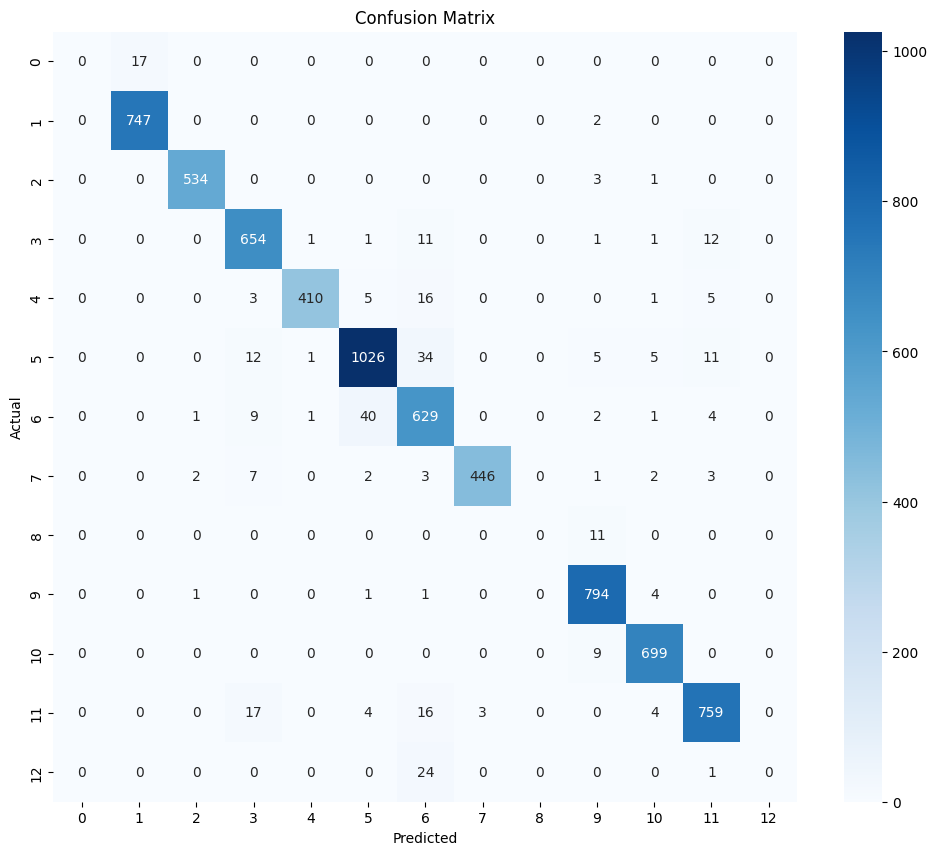

In [31]:
# visualization confusion matrix
plt.figure(figsize=(12,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [32]:
# 7. Save the model and vectorizer
# -------------------------
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/product_classifier.pkl")
joblib.dump(vectorizer, "models/vectorizer.pkl")

print("Model and vectorizer successfully saved to folder models/")

Model and vectorizer successfully saved to folder models/
